In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Rename columns for clarity
data = data.rename(columns={'v1': 'Label', 'v2': 'Message'})
data = data[['Label', 'Message']]
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Missing values in the dataset:
Label      5572
Message       0
dtype: int64


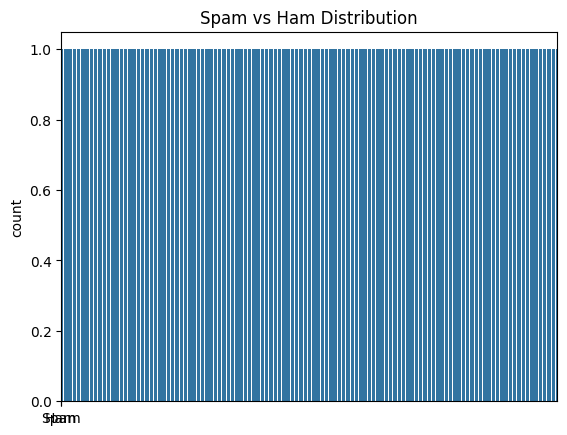

In [14]:
# Encode labels: 'ham' -> 0, 'spam' -> 1
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Visualize label distribution
sns.countplot(data['Label'])
plt.title("Spam vs Ham Distribution")
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

In [20]:
# Split the data into features (X) and target (y)
X = data['Message']
y = data['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vec)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.9838565022421525


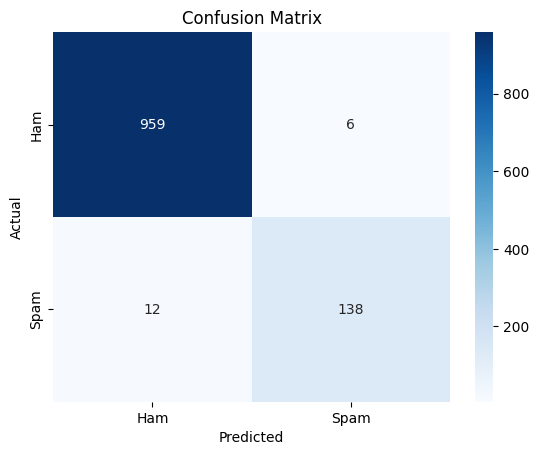

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))